In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import os
os.getcwd()

'D:\\INNOMATICS INTERN\\major-2\\reviews_data_dump\\ml_flow and artifect'

In [5]:
import os

def getting_data(x):
    for folder_name, sub_folder, file_name in os.walk(x):
        for subfolder in sub_folder:
            if subfolder.endswith('reviews_badminton'):
                sub_folder_path = os.path.join(folder_name, subfolder)
                for file_name in os.listdir(sub_folder_path):
                    if file_name.endswith('.csv'):
                        path = os.path.join(sub_folder_path, file_name)
                        return path
    return None

x = os.getcwd()
path = getting_data(x)

In [6]:
path

'D:\\INNOMATICS INTERN\\major-2\\reviews_data_dump\\ml_flow and artifect\\reviews_badminton\\data.csv'

In [7]:
def reading_file(x):
    df = pd.read_csv(x, encoding = 'unicode_escape')
    return df
df = reading_file(path)

In [8]:
df.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust Ã¢?Â¹620 ..from retailer.I did...        1

In [9]:
df.shape

(8518, 8)

Reviewer Name  \
0                                          Kamal Suresh   
1                                     Flipkart Customer   
2                                A. S. Raja Srinivasan    
5                                           Baji Sankar   
6                                     Flipkart Customer   
7                                     Flipkart Customer   
8                                        Jafar  Qureshi   
9                                              Bheemesh   
10                                           ABBCD Zggg   
11                                     Sadashivu Shetty   
12                                           Abhishek m   
13                                             Hashim A   
14                                        Karan Dattani   
15                                          Divya Mohan   
16                                             Harish R   
17                                           D.SELVARAJ   
18                                      Priyadarsshan D   
19                                     AMITPRATAP SINGH   
20                                       ramesh arjunan   
21                                         Rohit Pillai   
22                                            Sanju Mca   
23                                           Rohit Garg   
24                                      Shivendra Singh   
25                                 Sathish Kumar Kannan   
26                                       N R S Customer   
27                                     Sidhartha Biswal   
28                                    Flipkart Customer   
29                                D Maruthi Vidya sagar   
30                              Abubakkarsiddiq  Siddiq   
31                                      arovi chawngthu   
35                              prakashdass prakashdass   
36                                       ABHISHEK RAWAL   
37                                       Prabhu Nandha    
38                                    Flipkart Customer   
39                                     ARUNKUMAR REGIDI   
40                                          Madhu Mohan   
41                               Hemendra  Singh Thakur   
42                                      Venkatesh Yerra   
43                                            Ashu Tosh   
45                                    Flipkart Customer   
46                                   Prashanth Nagendra   
47                                                Mohit   
48                                            Sajin Raj   
49                                    Flipkart Customer   
50                                    Flipkart Customer   
51                                          Razi Sadath   
52                                              Mogan M   
53                                    Rahul Jaisinghani   
54                                    Flipkart Customer   
55                                      SANTOSH SANTOSH   
56                                       Tejas Dukhande   
57                                             Barath T   
58                                  Venkat  Kolishetti    
59                                            Akhil Aki   
60                                             Md Nezam   
61                                        Damodar Naidu   
62                                          Manju Vijay   
63                                        Sudesh Pareek   
64                                       Prabhat Sehgal   
65                                          Suraj Singh   
66                                   Laxman  Chalamarad   
67                                         Abhilash H M   
68                                    Flipkart Customer   
69                                            Sadique P   
70                                         Ganesh Reddy   
71                                        Anurag Tiwari   
72                                      pankaj pathania   
73                            

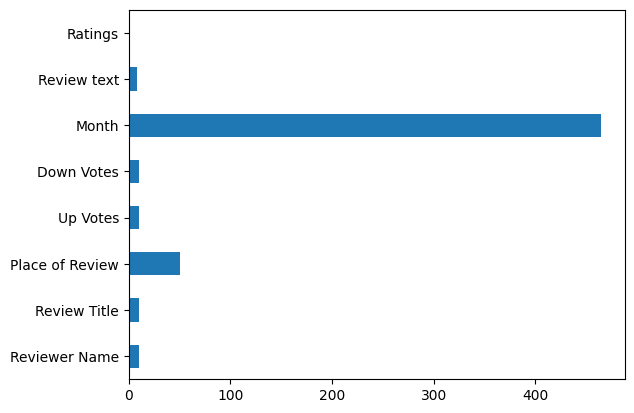

In [10]:
def preprocessing(x):
    x.isna().sum().plot(kind = 'barh')
    x.dropna(inplace = True)
    x.drop_duplicates(inplace = True)
    return x
preprocessing(df)

In [11]:
df.iloc[:,-2]

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
7                Good quality original shuttles.READ MORE
8                                        AwesomeREAD MORE
9                         nice original productsREAD MORE
10      This GREEN CAP SHUTTLECOCK is really AWESOME. ...
11                             Best in class....READ MORE
12      it's genuine and price is less than our near b...
13      This is the second time i am getting an opened...
14      really satisfied with the quality and the prom...
15                                           NycREAD MORE
16      I usually buy them the same model but this did...
17                    Poor quality, not originalREAD MORE
18                    Delivered on expected timeREAD MORE
19            

In [12]:
def spliting_data(x):
    X = x.iloc[:,-2]
    Y = x.iloc[:,-1]
    Y = Y.apply(lambda x : 'Positive' if x >=3 else 'Negative')
    return X,Y
X,Y = spliting_data(df)

In [13]:
Y.head()

0    Positive
1    Negative
2    Negative
5    Positive
6    Positive
Name: Ratings, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
def spliting_train_test(x,y):
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state=42,shuffle=True)
    return X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = spliting_train_test(X,Y)

In [15]:
X_train.shape

(5609,)

In [16]:
X_test.shape

(2404,)

In [17]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
import joblib

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import re
def cleaning_input(x):
    lemme = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    emoji_pattern = re.compile(r"(\s*)([\U0001F600-\U0001F64F"
                               r"\U0001F300-\U0001F5FF"
                               r"\U0001F680-\U0001F6FF"
                               r"\U0001F1E0-\U0001F1FF"
                               r"\U00002500-\U00002BEF"
                               r"\U00002702-\U000027B0"
                               r"\U000024C2-\U0001F251"
                               r"\U0001f926-\U0001f937"
                               r"\U00010000-\U0010ffff"
                               r"\u2640-\u2642"
                               r"\u2600-\u2B55"
                               r"\u200d"
                               r"\u23cf"
                               r"\u23e9"
                               r"\u231a"
                               r"\ufe0f"
                               r"\u3030"
                               r"]{1,})", flags=re.UNICODE)
    x = emoji_pattern.sub(r'\1', x)
    sentence = re.sub(r'[^a-zA-Z]', '', x)
    sentence = re.sub(r'[^\w\s]|[\d]', " ",sentence)
    sentence = sentence.split()
    sentence = [word.lower() for word in sentence if word not in stop_words]
    cleaned_text = [lemme.lemmatize(word) for word in sentence]
    return ' '.join(cleaned_text)
X_train = X_train.apply(lambda x : cleaning_input(x))

In [20]:
X_train

1732                                      loveditreadmore
1871                                      perfectreadmore
7528                                  goodqualityreadmore
7783                            productisverygoodreadmore
1931                                worthformoneyreadmore
8101                                  goodqualityreadmore
4193                                  goodqualityreadmore
8002    dontbuyproductsinflipkarttheyarenotgaveanyupda...
7318                                  goodqualityreadmore
5733              iaskedforgreencapbutcamebluecapreadmore
4180                                     verynicereadmore
1441               genuineproductthankyouflipkartreadmore
7263                                         goodreadmore
4321    atlastigotitalthoughverylateduetolockdowndeliv...
7532    receivedacompletelydifferentitemofcheapquality...
1728               quickdeliveryandgenuineproductreadmore
4085                                         nicereadmore
291           

In [21]:
!pip install mlflow

In [22]:
import mlflow

mlflow.set_experiment("Sentiment_model_selection")

<Experiment: artifact_location='file:///D:/INNOMATICS%20INTERN/major-2/reviews_data_dump/ml_flow%20and%20artifect/mlruns/638383882269169819', creation_time=1711394225266, experiment_id='638383882269169819', last_update_time=1711394225266, lifecycle_stage='active', name='Sentiment_model_selection', tags={}>

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
from joblib import Memory
import mlflow.sklearn

cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)
pipelines = {
    'knn': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=cleaning_input)),
        ('classifier', KNeighborsClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=cleaning_input)),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=cleaning_input)),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('classifier', GaussianNB())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', TfidfVectorizer(preprocessor=cleaning_input)),
        ('classifier', DecisionTreeClassifier())
    ])
}

param_grids = {
    'knn': [
        {
            'vectorization__max_features': [1000,1500,2000],
            'vectorization__ngram_range': [(1, 1), (1, 2)],
            'classifier__n_neighbors': [5, 10, 15],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features': [1000,1500,2000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    ],
    'naive_bayes': [
        {
            'vectorization__max_features': [1000,1500,2000]
        }
    ],
    'decision_tree': [
        {
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1,
                               n_jobs=1  
                               )
    mlflow.sklearn.autolog(max_tuning_runs=None)
    with mlflow.start_run() as run:
        grid_search.fit(X_train, Y_train)
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, Y_test))
    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********


2024/03/26 17:42:47 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Train Score:  0.8908901684102398


2024/03/26 17:49:30 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Test Score:  0.8922628951747088

********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Score:  0.8937420593085179


2024/03/26 17:50:56 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Test Score:  0.8955906821963394

********** naive_bayes **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Score:  0.30540054477715184


2024/03/26 17:51:39 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Test Score:  0.2687188019966722

********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Score:  0.8935638061890883
Test Score:  0.8976705490848585



In [ ]:
#logistic_regression': [
        {
            'vectorization__max_features': [1500],
            'classifier__C': [10],
            'classifier__penalty': ['l2']